# Frequency Sweep


In [ ]:
import matplotlib.pyplot as plt

def print_results(sumz, rad): # returns e-value dependent on radius
    print('SUMZ mils/kip', sumz,
        'E-VALUE psi', 1.0 / (2.0 * rad * sumz * 1e-6))

def ndt1_readline(file_handle, rad):
    a_line = file_handle.readline()
    a_line = file_handle.readline()
    old_ndt_id = "---" 
    ndt_values = []
    while True:
        a_line = file_handle.readline()
        if a_line.strip() == "**" or a_line.strip() == "":
            sumz = ndte(ndt_values)
            print_results(sumz, rad)
            break
        ndt_id = a_line[:3]
        if ndt_id == old_ndt_id or old_ndt_id.strip() == "---":
            ndt_values += a_line[6:68].strip().split(" ")
            old_ndt_id = ndt_id 
        else:
            sumz = ndte(ndt_values)
            print_results(sumz, rad)
            old_ndt_id = ndt_id

def ndte(ndt_values): # returns sumz
    a_z, a_f, a_h, a_z_f = [], [], [], []
    for i in range(len(ndt_values)//3):
        a_z.append(float(ndt_values[i * 3])/1000)
        a_f.append(float(ndt_values[i * 3 + 1])/10000)
        a_h.append(float(ndt_values[i * 3 + 2])/1000)
    max_z_f = 0.0
    max_i_z_f = 0
    a_z = a_z[::-1]
    a_f = a_f[::-1]
    a_h = a_h[::-1] 
    for i in range(len(a_z)):
        z_f = a_z[i] / a_f[i]
        if z_f > max_z_f:
            max_z_f = z_f
            max_i_z_f = i
        a_z_f.append(z_f)
    plt.stem(a_h, a_z_f,
             markerfmt="", basefmt="-b")
    plt.title('Disp/Force vs Frequency')
    plt.xlabel('Frequency, hz')
    plt.ylabel('mils/kip')
    plt.show() 
    sumz = a_z_f[max_i_z_f] / 2.0 * (a_h[max_i_z_f] +
        a_h[max_i_z_f + 1]) / (2.0 * a_h[max_i_z_f])
    for i in range(max_i_z_f + 1, len(a_z_f) - 1):
        sumz += a_z_f[i] / 2.0 * (a_h[i + 1] - a_h[i - 1]) / (2.0 * a_h[i])
    sumz += a_z_f[len(a_z_f) - 1] / 4.0
    return sumz



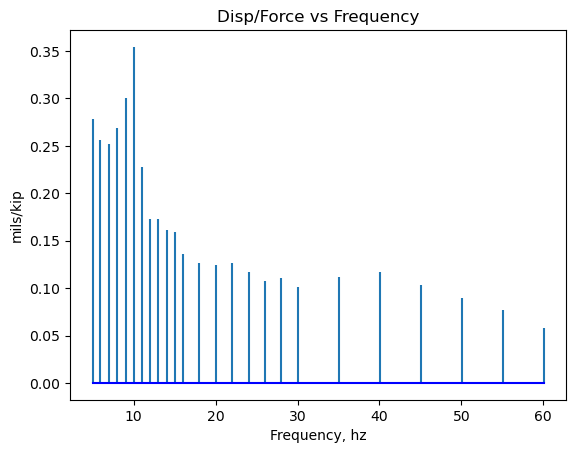

H(1) 10.012 SUMZ mils/kip 0.308850687525113 EVALUE psi 179878.3612908042


In [2]:
file_input = open("ndt_data.txt")
ndt1_readline(file_input, 9) # file_input, radius, inch
file_input.close()
